## Example 1: Spin-Bath model
### Introduction

The HEOM method solves the dynamics and steady state of a system and its environment, the latter of which is encoded in a set of auxiliary density matrices.

In this example we show the evolution of a single two-level system in contact with a single Bosonic environment.  The properties of the system are encoded in Hamiltonian, and a coupling operator which describes how it is coupled to the environment.

The Bosonic environment is implicitly assumed to obey a particular Hamiltonian (see paper), the parameters of which are encoded in the spectral density, and subsequently the free-bath correlation functions.

In the example below we show how to model the overdamped Drude-Lorentz Spectral Density, commonly used with the HEOM. We show how to do this the Matsubara, Pade and fitting decompositions, and compare their convergence.  

### Drude-Lorentz (overdamped) spectral density
The Drude-Lorentz spectral density is:

$$J_D(\omega)= \frac{2\omega\lambda\gamma}{{\gamma}^2 + \omega^2}$$

where $\lambda$ scales the coupling strength, and $\gamma$ is the cut-off frequency.  We use the convention,
\begin{equation*}
C(t) = \int_0^{\infty} d\omega \frac{J_D(\omega)}{\pi}[\coth(\beta\omega) \cos(\omega \tau) - i \sin(\omega \tau)]
\end{equation*}

With the HEOM we must use an exponential decomposition:

\begin{equation*}
C(t)=\sum_{k=0}^{k=\infty} c_k e^{-\nu_k t}
\end{equation*}

As an example, the Matsubara decomposition of the Drude-Lorentz spectral density is given by:

\begin{equation*}
    \nu_k = \begin{cases}
               \gamma               & k = 0\\
               {2 \pi k} / {\beta }  & k \geq 1\\
           \end{cases}
\end{equation*}

\begin{equation*}
    c_k = \begin{cases}
               \lambda \gamma (\cot(\beta \gamma / 2) - i)             & k = 0\\
               4 \lambda \gamma \nu_k / \{(nu_k^2 - \gamma^2)\beta \}    & k \geq 1\\
           \end{cases}
\end{equation*}

Note that in the above, and the following, we set $\hbar = k_\mathrm{B} = 1$.

###  Brownian motion (underdamped) spectral density
The underdamped spectral density is:

$$J_U = \frac{\alpha^2 \Gamma \omega}{(\omega_c^2 - \omega^2)^2 + \Gamma^2 \omega^2)}.$$

Here $\alpha$  scales the coupling strength, $\Gamma$ is the cut-off frequency, and $\omega_c$ defines a resonance frequency.  With the HEOM we must use an exponential decomposition:

The Matsubara decomposition of this spectral density is, in real and imaginary parts:



\begin{equation*}
    c_k^R = \begin{cases}
               \alpha^2 \coth(\beta( \Omega + i\Gamma/2)/2)/4\Omega & k = 0\\
               \alpha^2 \coth(\beta( \Omega - i\Gamma/2)/2)/4\Omega & k = 0\\
              -2\alpha^2\Gamma/\beta \frac{\epsilon_k }{((\Omega + i\Gamma/2)^2 + \epsilon_k^2)(\Omega - i\Gamma/2)^2 + \epsilon_k^2)}      & k \geq 1\\
           \end{cases}
\end{equation*}

\begin{equation*}
    \nu_k^R = \begin{cases}
               -i\Omega  + \Gamma/2, i\Omega  +\Gamma/2,             & k = 0\\
               {2 \pi k} / {\beta }  & k \geq 1\\
           \end{cases}
\end{equation*}




\begin{equation*}
    c_k^I = \begin{cases}
               i\alpha^2 /4\Omega & k = 0\\
                -i\alpha^2 /4\Omega & k = 0\\
           \end{cases}
\end{equation*}

\begin{equation*}
    \nu_k^I = \begin{cases}
               i\Omega  + \Gamma/2, -i\Omega  + \Gamma/2,             & k = 0\\
           \end{cases}
\end{equation*}

Note that in the above, and the following, we set $\hbar = k_\mathrm{B} = 1$.



In [1]:
%pylab inline


The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from qutip import *

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:

#Here we import both python and c++ solvers to compare results and performance
from heom_fmotd import BosonicHEOMSolver
from heom_fmotd_py import BosonicHEOMSolver as BosonicHEOMSolverPy

In [5]:

def cot(x):
    return 1./np.tan(x)


In [6]:
# Defining the system Hamiltonian
eps = .0    # Energy of the 2-level system.
Del = .2    # Tunnelling term
Hsys = 0.5 * eps * sigmaz() + 0.5 * Del* sigmax()

In [7]:
# Initial state of the system.
rho0 = basis(2,0) * basis(2,0).dag()  

In [8]:
from mpmath import mp
from mpmath import zeta
from mpmath import gamma

mp.dps = 15; mp.pretty = True

In [142]:

Q = sigmaz()

alpha = 3.25
T = 0.5

wc = 1
beta  = 1/T 
s = 1


tlist = np.linspace(0, 10, 5000)
tlist3 = linspace(0,15,50000)
#tlist3 = linspace(0,50,10000)

#note: the arguments to zeta should be in as high precision as possible, might need some adjustment
# see http://mpmath.org/doc/current/basics.html#providing-correct-input
ct = [complex((1/pi)*alpha * wc**(1-s) * beta**(-(s+1)) * (zeta(s+1,(1+beta*wc-1.0j*wc*t)/(beta*wc)) + 
            zeta(s+1,(1+1.0j*wc*t)/(beta*wc)))) for t in tlist]


#also check long timescales
ctlong = [complex((1/pi)*alpha * wc**(1-s) * beta**(-(s+1)) * (zeta(s+1,(1+beta*wc-1.0j*wc*t)/(beta*wc)) + 
            zeta(s+1,(1+1.0j*wc*t)/(beta*wc)))) for t in tlist3]


corrRana =  real(ctlong)
corrIana = imag(ctlong)


pref = 1.



1
2
3
4
[6.14746382 1.77939431 0.1       ]


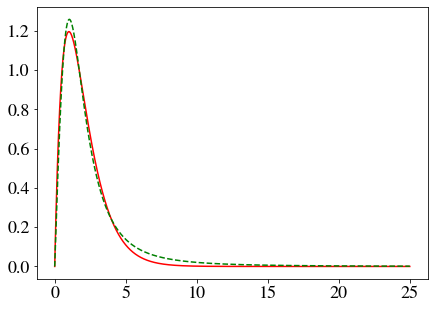

[2.21188264 3.26249309 1.24955568 1.43449015 0.1        1.80554808]


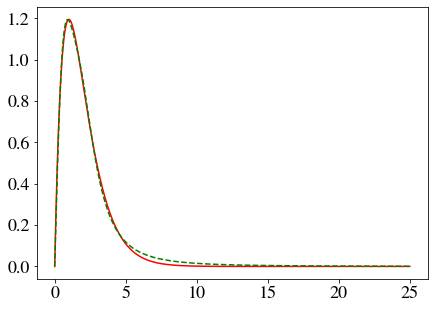

[1.12733347 1.65012228 2.33938897 1.00886271 1.18463184 1.09363627
 0.13221112 2.69747621 1.37002274]


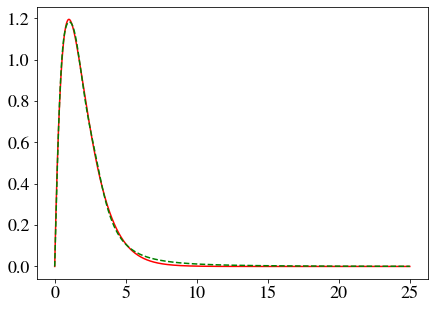

[ 0.60083769  7.91592715 -4.40789351  0.01058517  1.0024684   2.29619019
  4.29908166  0.30736353  0.1         0.1         3.98168595  0.1       ]


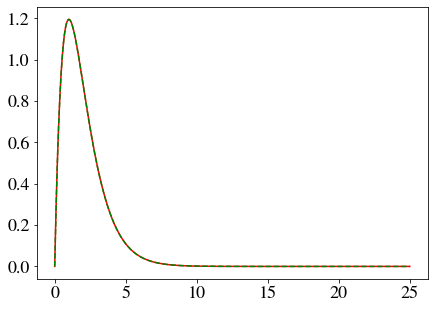

In [261]:

#lets try fitting the spectrurum
#use underdamped case with meier tannor form 
#tlist2 = tlist

wlist = np.linspace(0, 25, 20000)

from scipy.optimize import curve_fit

#seperate functions for plotting later:



def fit_func_nocost(x, a, b, c, N):
    tot = 0
    for i in range(N):
        # print(i)
        #tot += a[i]*np.exp(b[i]*x)*np.cos(c[i]*x + d[i])
        #tot+= a[i] * b[i] * (x)/(((x**2) + (b[i]**2)))
        #tot+= 2 * a[i] * b[i] * (x)/(((x+c[i])**2 + (b[i]**2))*((x-c[i])**2 + (b[i]**2)))
        tot+= 2 * a[i] * b[i] * (x)/(((x+c[i])**2 + (b[i]**2))*((x-c[i])**2 + (b[i]**2)))
    cost = 0.
    
    return tot   

def wrapper_fit_func_nocost(x, N, *args):
    a, b, c = list(args[0][:N]), list(args[0][N:2*N]),list(args[0][2*N:3*N])
    # print("debug")
    return fit_func_nocost(x, a, b, c, N)


# function that evaluates values with fitted params at
# given inputs
def checker(tlist, vals, N):
    y = []
    for i in tlist:
        # print(i)
        
        y.append(wrapper_fit_func_nocost(i, N, vals))
    return y


#######
#Real part 

def wrapper_fit_func(x, N, *args):
    a, b, c = list(args[0][:N]), list(args[0][N:2*N]),list(args[0][2*N:3*N])
    # print("debug")
    return fit_func(x, a, b, c, N)



def fit_func(x, a, b, c,  N):
    tot = 0
    for i in range(N):
        # print(i)
        #tot+= a[i] * b[i] * (x)/(((x**2) + (b[i]**2)))
        #tot+= a[i] * b[i] * (x)/(((x**2-c[i]**2)**2 + (x**2*b[i]**2)))
        tot+= 2 * a[i] * b[i] * (x)/(((x+c[i])**2 + (b[i]**2))*((x-c[i])**2 + (b[i]**2)))
    cost = 0.
    #for i in range(N):
        #print(i)
    #    cost += ((corrRana[0]-a[i]*np.cos(d[i])))
        
        
    tot+=0.0*cost
    
    return tot      

def fitterR(ans, tlist, k):
    # the actual computing of fit
    popt = []
    pcov = [] 
    # tries to fit for k exponents
    for i in range(k):
        #params_0 = [0]*(2*(i+1))
        params_0 = [0.]*(3*(i+1))
        upper_a = 100*abs(max(ans, key = abs))
        #sets initial guess
        guess = []
        #aguess = [ans[0]]*(i+1)#[max(ans)]*(i+1)
        aguess = [abs(max(ans, key = abs))]*(i+1)
        bguess = [1*wc]*(i+1)
        cguess = [1*wc]*(i+1)
        
        guess.extend(aguess)
        guess.extend(bguess)
        guess.extend(cguess)
       
        # sets bounds
        # a's = anything , b's negative
        # sets lower bound
        b_lower = []
        alower = [-upper_a]*(i+1)
        blower = [0.1*wc]*(i+1)
        clower = [0.1*wc]*(i+1)
        
        b_lower.extend(alower)
        b_lower.extend(blower)
        b_lower.extend(clower)
        
        # sets higher bound
        b_higher = []
        ahigher = [upper_a]*(i+1)
        #bhigher = [np.inf]*(i+1)
        bhigher = [100*wc]*(i+1)
        chigher = [100*wc]*(i+1)
      
        b_higher.extend(ahigher)
        b_higher.extend(bhigher)
        b_higher.extend(chigher)
       
        param_bounds = (b_lower, b_higher)
        
        p1, p2 = curve_fit(lambda x, *params_0: wrapper_fit_func(x, i+1, \
            params_0), tlist, ans, p0=guess, bounds = param_bounds,sigma=[0.0001 for w in wlist], maxfev = 1000000000)
        popt.append(p1)
        pcov.append(p2)
        print(i+1)
    return popt
# print(popt)


J = [w * alpha * e**(-w/wc)  for w in wlist]
k = 4
popt1 = fitterR(J, wlist, k)
for i in range(k):
    y = checker(wlist, popt1[i],i+1)
    print(popt1[i])
    plt.plot(wlist, J, wlist, y)
    
    plt.show()
  
#tlist3 = linspace(0,1,1000)

#y = checker(tlist3, popt2[k-1],k)
#plt.plot(tlist3, imag(ctlong), tlist3, y)

#plt.show()

In [262]:


lam = list(popt1[k-1])[:k]

gamma = list(popt1[k-1])[k:2*k] #damping terms

w0 = list(popt1[k-1])[2*k:3*k] #w0 termss




print(lam)
print(gamma)
print(w0)

[0.60083768747418, 7.9159271481798354, -4.407893509547376, 0.010585173501683682]
[1.0024683988395526, 2.296190188285376, 4.299081656029848, 0.30736352564766894]
[0.10000000000000002, 0.10000000000032039, 3.981685947699812, 0.10000000000000002]


[0.60083768747418, 7.9159271481798354, -4.407893509547376, 0.010585173501683682]
[1.0024683988395526, 2.296190188285376, 4.299081656029848, 0.30736352564766894]
[0.10000000000000002, 0.10000000000032039, 3.981685947699812, 0.10000000000000002]


3.3300521001546585e-12


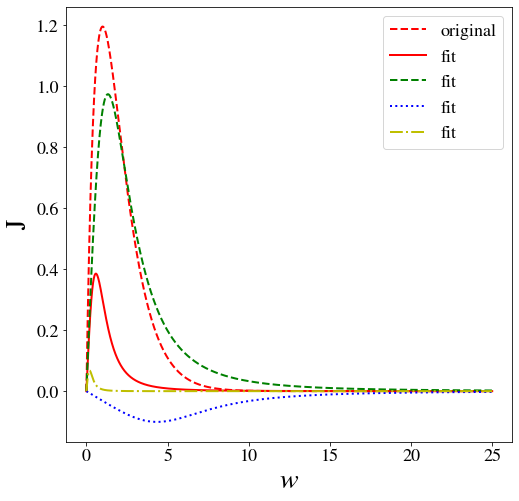

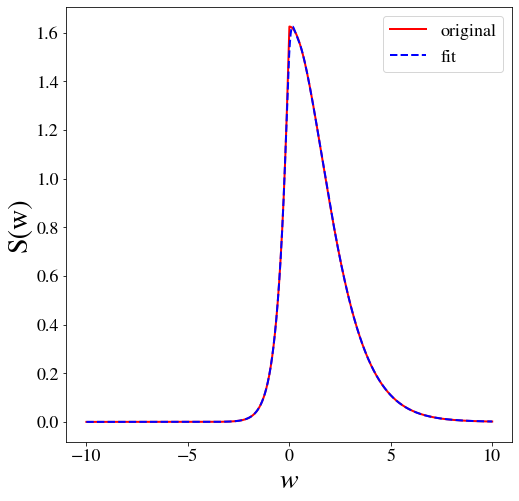

In [263]:

lamT = []

print(lam)
print(gamma)
print(w0)

fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))
axes.plot(wlist, J, 'r--', linewidth=2, label="original")
for kk,ll in enumerate(lam):
    #axes.plot(wlist,  [lam[kk] * gamma[kk] * (w)/(((w**2-w0[kk]**2)**2 + (gamma[kk]**2*w**2))) for w in wlist],linewidth=2)
    axes.plot(wlist,  [2* lam[kk] * gamma[kk] * (w)/(((w+w0[kk])**2 + (gamma[kk]**2))*((w-w0[kk])**2 + (gamma[kk]**2))) for w in wlist],linewidth=2, label="fit")





axes.set_xlabel(r'$w$', fontsize=28)
axes.set_ylabel(r'J', fontsize=28)

axes.legend()
fig.savefig('noisepower.eps')
wlist2 = np.linspace(-10,10 , 50000)



s1 =  [w * alpha * e**(-abs(w)/wc) *  ((1/(e**(w/T)-1))+1) for w in wlist2]
s2 = [sum([(2* lam[kk] * gamma[kk] * (w)/(((w+w0[kk])**2 + (gamma[kk]**2))*((w-w0[kk])**2 + (gamma[kk]**2)))) * ((1/(e**(w/T)-1))+1)  for kk,lamkk in enumerate(lam)]) for w in wlist2]


fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))
axes.plot(wlist2, s1, 'r', linewidth=2,label="original")
axes.plot(wlist2, s2, 'b', linewidth=2,label="fit")

axes.set_xlabel(r'$w$', fontsize=28)
axes.set_ylabel(r'S(w)', fontsize=28)

#axes.axvline(x=Del)
print(min(s2))
axes.legend()

#fig.savefig('powerspectrum.eps')
#J(w>0) * (n(w>w)+1)


In [266]:
def cot(x):
    return 1./np.tan(x)


def coth(x):
    """
    Calculates the coth function.
    
    Parameters
    ----------
    x: np.ndarray
        Any numpy array or list like input.
        
    Returns
    -------
    cothx: ndarray
        The coth function applied to the input.
    """
    return 1/np.tanh(x)

In [268]:

#underdamped meier tannior version with terminator


TermMax = 1000
TermOps = 0.*spre(sigmaz())
Nk = 1 # number of exponentials in approximation of the Matsubara approximation

pref = 1

ckAR = []
vkAR = []
ckAI = []
vkAI = []
for kk, ll in enumerate(lam):
    #print(kk)
    lamt = lam[kk]
    Om = w0[kk]
    Gamma = gamma[kk]
    print(T)
    print(coth(beta*(Om+1.0j*Gamma)/2))
    ckAR_temp = [(lamt/(4*Om))*coth(beta*(Om+1.0j*Gamma)/2),(lamt/(4*Om))*coth(beta*(Om-1.0j*Gamma)/2)]
    for k in range(1,Nk+1):
        #print(k)
        ek = 2*pi*k/beta
        ckAR_temp.append((-2*lamt*2*Gamma/beta)*ek/(((Om+1.0j*Gamma)**2+ek**2)*((Om-1.0j*Gamma)**2+ek**2)))
    
    
    
    term = 0
    for k in range(Nk+1,TermMax):
        #print(k)
        ek = 2*pi*k/beta
        ck = ((-2*lamt*2*Gamma/beta)*ek/(((Om+1.0j*Gamma)**2+ek**2)*((Om-1.0j*Gamma)**2+ek**2)))
        term += ck/ek
    ckAR.extend(ckAR_temp)
    
    vkAR_temp =   [-1.0j*Om+Gamma,1.0j*Om+Gamma]
    vkAR_temp.extend([2 * np.pi * k * T + 0.j for k in range(1,Nk+1)])
    
    vkAR.extend(vkAR_temp)
    factor=1./4.
    ckAI.extend([-factor*lamt*1.0j/(Om),factor*lamt*1.0j/(Om)])

    vkAI.extend( [-(-1.0j*(Om) - Gamma),-(1.0j*(Om) - Gamma)])
    
    TermOps += term * (2*spre(Q)*spost(Q.dag()) - spre(Q.dag()*Q) - spost(Q.dag()*Q))

print(ckAR)
print(vkAR)

Q2 = []

NR = len(ckAR)
NI = len(ckAI)

Q2.extend([ sigmaz() for kk in range(NR)])
Q2.extend([ sigmaz() for kk in range(NI)])
options = Options(nsteps=15000, store_states=True, rtol=1e-14, atol=1e-14)

0.5
(0.13974897556002197-0.6297171398194138j)
0.5
(0.17664345475450763+0.8710462271395351j)
0.5
(0.999528560660008-0.0005117331721781953j)
0.5
(0.9911396415614544-2.839161761980097j)
[(0.20991612825592318-0.9458944751298783j), (0.20991612825592318+0.9458944751298783j), (-0.04802667599727985+0j), (3.4957417975875082+17.237846191778434j), (3.4957417975875082-17.237846191778434j), (-5.3276721492789765+0j), (-0.2766300201103056+0.00014162752649838175j), (-0.2766300201103056-0.00014162752649838175j), (0.09723738681206452+0j), (0.026228462675811418-0.07513254962476318j), (0.026228462675811418+0.07513254962476318j), (-0.0002134910414080296+0j)]
[(1.0024683988395526-0.10000000000000002j), (1.0024683988395526+0.10000000000000002j), (3.141592653589793+0j), (2.296190188285376-0.10000000000032039j), (2.296190188285376+0.10000000000032039j), (3.141592653589793+0j), (4.299081656029848-3.981685947699812j), (4.299081656029848+3.981685947699812j), (3.141592653589793+0j), (0.30736352564766894-0.10000000

(1.0024683988395526+0.10000000000000002j)
(1.0024683988395526-0.10000000000000002j)
(2.296190188285376+0.10000000000032039j)
(2.296190188285376-0.10000000000032039j)
(4.299081656029848+3.981685947699812j)
(4.299081656029848-3.981685947699812j)
(0.30736352564766894+0.10000000000000002j)
(0.30736352564766894-0.10000000000000002j)


Text(0, 0.5, 'Im[C(t)]')

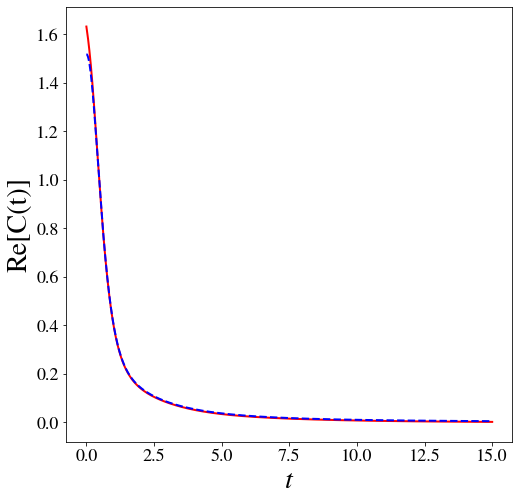

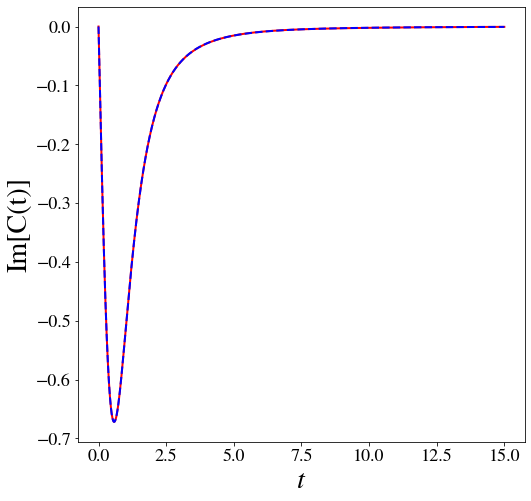

In [270]:
#corrRana =  real(ct)
#corrIana = imag(ct)
corrRana =  real(ctlong)
corrIana = imag(ctlong)

def checker2(tlisttemp):
    y = []
    for i in tlisttemp:
        # print(i)
        
        temp = []
        for kkk,ck in enumerate(ckAR):
            
            temp.append(ck*exp(-vkAR[kkk]*i))
            
        y.append(sum(temp))
    return y


yR = checker2(tlist3)



# function that evaluates values with fitted params at
# given inputs
def checker2(tlisttemp):
    y = []
    for i in tlisttemp:
        # print(i)
        
        temp = []
        for kkk,ck in enumerate(ckAI):
            if i==0: 
                print(vkAI[kkk])
            temp.append(ck*exp(-vkAI[kkk]*i))
            
        y.append(sum(temp))
    return y



yI = checker2(tlist3)



/home/neill/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


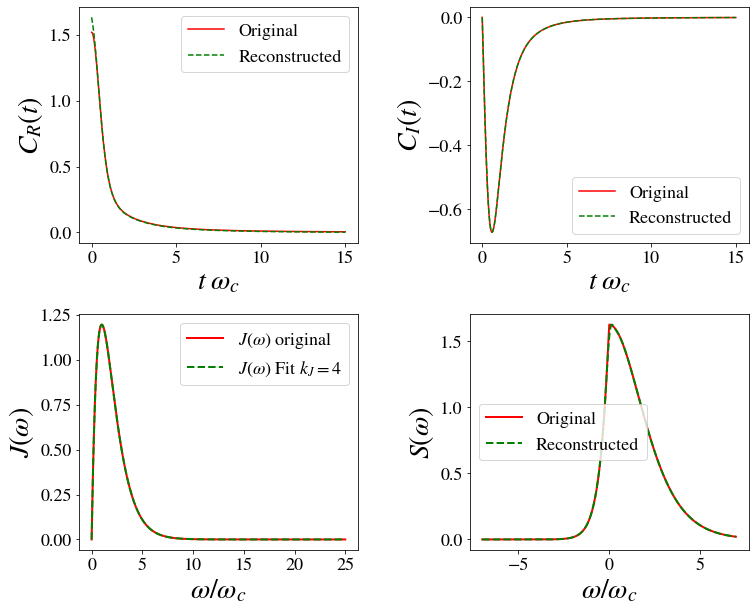

In [281]:

from cycler import cycler

wlist2 = np.linspace(-2*pi*4,2 * pi *4 , 50000)
wlist2 = np.linspace(-7,7 , 50000)




fig = plt.figure(figsize=(12,10))
grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)

default_cycler = (cycler(color=['r', 'g', 'b', 'y','c','m','k']) +
                  cycler(linestyle=['-', '--', ':', '-.',(0, (1, 10)), (0, (5, 10)),(0, (3, 10, 1, 10))]))
plt.rc('axes',prop_cycle=default_cycler )

axes1 = fig.add_subplot(grid[0,0])

axes1.plot(tlist2, corrRana,label="Original")
axes1.plot(tlist2, yR,label="Reconstructed")
axes1.legend(loc=0)

axes1.set_ylabel(r'$C_R(t)$',fontsize=28)

axes1.set_xlabel(r'$t\;\omega_c$',fontsize=28)
axes1.locator_params(axis='y', nbins=6)
axes1.locator_params(axis='x', nbins=6)

axes2 = fig.add_subplot(grid[0,1])

axes2.plot(tlist2, corrIana,label="Original")
axes2.plot(tlist2, yI,label="Reconstructed")
axes2.legend(loc=0)

axes2.set_ylabel(r'$C_I(t)$',fontsize=28)

axes2.set_xlabel(r'$t\;\omega_c$',fontsize=28)
axes2.locator_params(axis='y', nbins=6)
axes2.locator_params(axis='x', nbins=6)

axes3 = fig.add_subplot(grid[1,0])


axes3.plot(wlist, J,  linewidth=2,label="$J(\omega)$ original")
y = checker(wlist, popt1[3],4)
axes3.plot(wlist,  y,  linewidth=2, label="$J(\omega)$ Fit $k_J = 4$")

axes3.set_ylabel(r'$J(\omega)$',fontsize=28)

axes3.set_xlabel(r'$\omega/\omega_c$',fontsize=28)
axes3.locator_params(axis='y', nbins=6)
axes3.locator_params(axis='x', nbins=6)
axes3.legend(loc=0)



s1 =  [w * alpha * e**(-abs(w)/wc) *  ((1/(e**(w/T)-1))+1) for w in wlist2]
s2 = [sum([(2* lam[kk] * gamma[kk] * (w)/(((w+w0[kk])**2 + (gamma[kk]**2))*((w-w0[kk])**2 + (gamma[kk]**2)))) * ((1/(e**(w/T)-1))+1)  for kk,lamkk in enumerate(lam)]) for w in wlist2]


axes4 = fig.add_subplot(grid[1,1])



axes4.plot(wlist2, s1, linewidth=2,label="Original")
axes4.plot(wlist2, s2, linewidth=2,label="Reconstructed")

axes4.set_xlabel(r'$\omega/\omega_c$', fontsize=28)
axes4.set_ylabel(r'$S(\omega)$', fontsize=28)
axes4.locator_params(axis='y', nbins=6)
axes4.locator_params(axis='x', nbins=6)
axes4.legend()

fig.savefig("figFiJspec.pdf")


In [208]:
NR = len(ckAR)
NI = len(ckAI)
print(NR)
print(NI)

9
6


In [209]:



NC = 11


NR = len(ckAR)
NI = len(ckAI)
print(NR)
print(NI)
Q2 = []
Q2.extend([ sigmaz() for kk in range(NR)])
Q2.extend([ sigmaz() for kk in range(NI)])



9
6


In [210]:

#Q2 = [Q for kk in range(NR+NI)]
#print(Q2)

options = Options(nsteps=1500, store_states=True, rtol=1e-12, atol=1e-12, method="bdf") 
import time 

start = time.time()
print("start")


Ltot = liouvillian(Hsys) + TermOps

#HEOMFit = BosonicHEOMSolverPY(Hsys, Q2, ckAR2, ckAI2, vkAR2, vkAI2, NC, options=options)
HEOMFit = BosonicHEOMSolver(Ltot, Q2, ckAR, ckAI, vkAR, vkAI, NC, options=options)

print("hello")
end = time.time()
print(end - start)

start
hello
59.26774477958679


In [211]:
#tlist4 = np.linspace(0, 50, 1000)

tlist4 = np.linspace(0, 4*pi/Del, 600)
tlist4 = np.linspace(0, 30*pi/Del, 600)

rho0 = basis(2,0) * basis(2,0).dag()   


import time
start = time.time()
resultFit = HEOMFit.run(rho0, tlist4)
print("hello")
end = time.time()
print(end - start)

hello
1566.6343910694122


In [212]:
# Define some operators with which we will measure the system
# 1,1 element of density matrix - corresonding to groundstate
P11p=basis(2,0) * basis(2,0).dag()
P22p=basis(2,1) * basis(2,1).dag()
# 1,2 element of density matrix  - corresonding to coherence
P12p=basis(2,0) * basis(2,1).dag()
# Calculate expectation values in the bases
P11exp11K3NK1TL = expect(resultFit.states, P11p)
P22exp11K3NK1TL = expect(resultFit.states, P22p)
P12exp11K3NK1TL = expect(resultFit.states, P12p)

In [174]:

tlist3 = linspace(0,15,50000)


#also check long timescales
ctlong = [complex((1/pi)*alpha * wc**(1-s) * beta**(-(s+1)) * (zeta(s+1,(1+beta*wc-1.0j*wc*t)/(beta*wc)) + 
            zeta(s+1,(1+1.0j*wc*t)/(beta*wc)))) for t in tlist3]


corrRana =  real(ctlong)
corrIana = imag(ctlong)

1
2
3


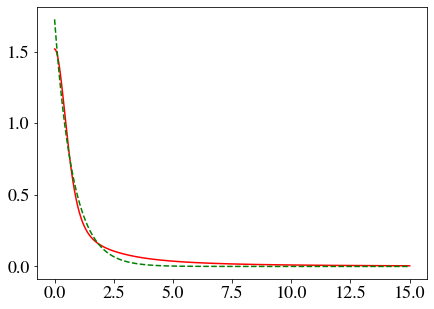

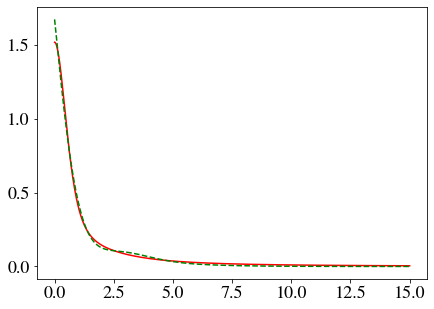

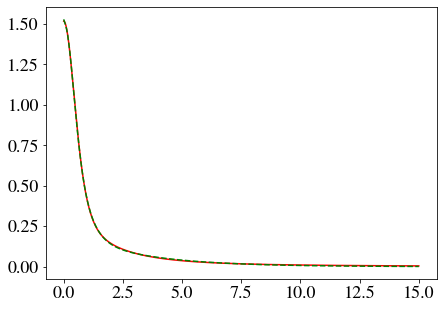

1
2
3


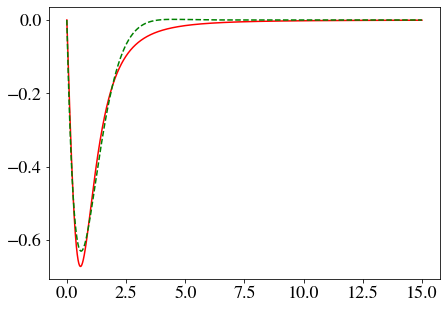

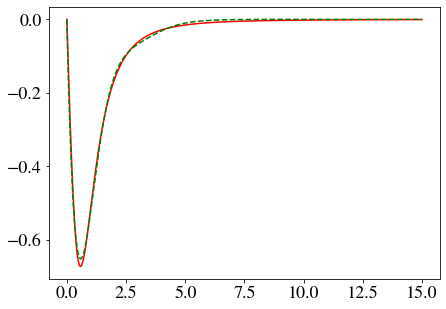

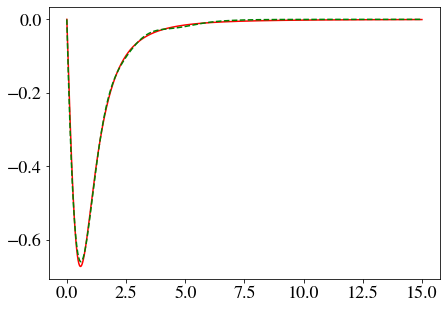

In [282]:

tlist2 = tlist3
from scipy.optimize import curve_fit

#seperate functions for plotting later:



def fit_func_nocost(x, a, b, c, N):
    tot = 0
    for i in range(N):
        # print(i)
        tot += a[i]*np.exp(b[i]*x)*np.cos(c[i]*x)
    cost = 0.
    
    return tot   

def wrapper_fit_func_nocost(x, N, *args):
    a, b, c = list(args[0][:N]), list(args[0][N:2*N]), list(args[0][2*N:3*N])
    # print("debug")
    return fit_func_nocost(x, a, b, c, N)


# function that evaluates values with fitted params at
# given inputs
def checker(tlist_local, vals, N):
    y = []
    for i in tlist_local:
        # print(i)
        
        y.append(wrapper_fit_func_nocost(i, N, vals))
    return y


#######
#Real part 

def wrapper_fit_func(x, N, *args):
    a, b, c = list(args[0][:N]), list(args[0][N:2*N]), list(args[0][2*N:3*N])
    # print("debug")
    return fit_func(x, a, b, c, N)



def fit_func(x, a, b, c, N):
    tot = 0
    for i in range(N):
        # print(i)
        tot += a[i]*np.exp(b[i]*x)*np.cos(c[i]*x )
    cost = 0.
    for i in range(N):
        #print(i)
        cost += ((corrRana[0]-a[i]))
        
        
    tot+=0.0*cost
    
    return tot      

def fitterR(ans, tlist_local, k):
    # the actual computing of fit
    popt = []
    pcov = [] 
    # tries to fit for k exponents
    for i in range(k):
        #params_0 = [0]*(2*(i+1))
        params_0 = [0.]*(3*(i+1))
        upper_a = 20*abs(max(ans, key = abs))
        #sets initial guess
        guess = []
        #aguess = [ans[0]]*(i+1)#[max(ans)]*(i+1)
        aguess = [abs(max(ans, key = abs))]*(i+1)
        bguess = [-wc]*(i+1)
        cguess = [wc]*(i+1)
        
        guess.extend(aguess)
        guess.extend(bguess)
        guess.extend(cguess) #c 
       
        # sets bounds
        # a's = anything , b's negative
        # sets lower bound
        b_lower = []
        alower = [-upper_a]*(i+1)
        blower = [-np.inf]*(i+1)
        clower = [0]*(i+1)
        
        b_lower.extend(alower)
        b_lower.extend(blower)
        b_lower.extend(clower)
        
        # sets higher bound
        b_higher = []
        ahigher = [upper_a]*(i+1)
        #bhigher = [np.inf]*(i+1)
        bhigher = [0.1]*(i+1)
        chigher = [np.inf]*(i+1)
        
        b_higher.extend(ahigher)
        b_higher.extend(bhigher)
        b_higher.extend(chigher)
      
        param_bounds = (b_lower, b_higher)
        
        p1, p2 = curve_fit(lambda x, *params_0: wrapper_fit_func(x, i+1, \
            params_0), tlist_local, ans, p0=guess, sigma=[0.1 for t in tlist_local], bounds = param_bounds, maxfev = 100000000)
        popt.append(p1)
        pcov.append(p2)
        print(i+1)
    return popt
# print(popt)



k = 3
popt1 = fitterR(corrRana, tlist2, k)
for i in range(k):
    y = checker(tlist2, popt1[i],i+1)
    plt.plot(tlist2, corrRana, tlist2, y)
    
    plt.show()
    


#y = checker(tlist3, popt1[k-1],k)
#plt.plot(tlist3, real(ctlong), tlist3, y)

#plt.show()


#######
#Imag part 



def fit_func2(x, a, b, c, N):
    tot = 0
    for i in range(N):
        # print(i)
        tot += a[i]*np.exp(b[i]*x)*np.sin(c[i]*x)
    cost = 0.
    for i in range(N):
        # print(i)
        cost += (corrIana[0]-a[i])
        
        
    tot+=0*cost
    
    return tot 
# actual fitting function


def wrapper_fit_func2(x, N, *args):
    a, b, c = list(args[0][:N]), list(args[0][N:2*N]), list(args[0][2*N:3*N])
    # print("debug")
    return fit_func2(x, a, b, c,  N)

# function that evaluates values with fitted params at
# given inputs
def checker2(tlist_local, vals, N):
    y = []
    for i in tlist_local:
        # print(i)
        
        y.append(wrapper_fit_func2(i, N, vals))
    return y

  
    
def fitterI(ans, tlist_local, k):
    # the actual computing of fit
    popt = []
    pcov = [] 
    # tries to fit for k exponents
    for i in range(k):
        #params_0 = [0]*(2*(i+1))
        params_0 = [0.]*(3*(i+1))
        upper_a = abs(max(ans, key = abs))*5
        #sets initial guess
        guess = []
        #aguess = [ans[0]]*(i+1)#[max(ans)]*(i+1)
        aguess = [-abs(max(ans, key = abs))]*(i+1)
        bguess = [-2]*(i+1)
        cguess = [1]*(i+1)
       
        guess.extend(aguess)
        guess.extend(bguess)
        guess.extend(cguess) #c 
        
        # sets bounds
        # a's = anything , b's negative
        # sets lower bound
        b_lower = []
        alower = [-upper_a]*(i+1)
        blower = [-100]*(i+1)
        clower = [0]*(i+1)
       
        b_lower.extend(alower)
        b_lower.extend(blower)
        b_lower.extend(clower)
      
        # sets higher bound
        b_higher = []
        ahigher = [upper_a]*(i+1)
        bhigher = [0.01]*(i+1)        
        chigher = [100]*(i+1)

        b_higher.extend(ahigher)
        b_higher.extend(bhigher)
        b_higher.extend(chigher)
    
        param_bounds = (b_lower, b_higher)
        
        p1, p2 = curve_fit(lambda x, *params_0: wrapper_fit_func2(x, i+1, \
            params_0), tlist_local, ans, p0=guess, sigma=[0.0001 for t in tlist_local], bounds = param_bounds, maxfev = 100000000)
        popt.append(p1)
        pcov.append(p2)
        print(i+1)
    return popt
# print(popt)

k1 = 3
popt2 = fitterI(corrIana, tlist2, k1)
for i in range(k1):
    y = checker2(tlist2, popt2[i], i+1)
    plt.plot(tlist2, corrIana, tlist2, y)
    plt.show()  
    
#tlist3 = linspace(0,1,1000)

#y = checker(tlist3, popt2[k-1],k)
#plt.plot(tlist3, imag(ctlong), tlist3, y)

#plt.show()

In [283]:
#ckAR1 = list(popt1[k-1])[:len(list(popt1[k-1]))//2]
ckAR1 = list(popt1[k-1])[:k]
#0.5 from cosine
ckAR = [0.5*x+0j for x in ckAR1]

#dress with exp(id)

#for kk in range(k):
#    ckAR[kk] = ckAR[kk]*exp(1.0j*list(popt1[k-1])[3*k+kk])

ckAR.extend(conjugate(ckAR)) #just directly double


# vkAR, vkAI
vkAR1 = list(popt1[k-1])[k:2*k] #damping terms
wkAR1 = list(popt1[k-1])[2*k:3*k] #oscillating term
vkAR = [-x-1.0j*wkAR1[kk] for kk, x in enumerate(vkAR1)] #combine
vkAR.extend([-x+1.0j*wkAR1[kk] for kk, x in enumerate(vkAR1)]) #double


print(ckAR)
print(vkAR)



[(0.11144410593349063+0j), (1.1220870984713296+0j), (-0.46905439824964296+0j), (0.11144410593349063-0j), (1.1220870984713296-0j), (-0.46905439824964296-0j)]
[(0.34246550478406607-1.3300052634275397e-20j), (2.217530091540586-2.464176361865918e-14j), (4.925330410074036-3.8813583110031855j), (0.34246550478406607+1.3300052634275397e-20j), (2.217530091540586+2.464176361865918e-14j), (4.925330410074036+3.8813583110031855j)]


In [284]:
#ckAR1 = list(popt1[k-1])[:len(list(popt1[k-1]))//2]
ckAI1 = list(popt2[k1-1])[:k1]
#0.5 from cosine
ckAI = [-1.0j*0.5*x for x in ckAI1]

#dress with exp(id)

#for kk in range(k1):
#    ckAI[kk] = ckAI[kk]*exp(1.0j*list(popt2[k1-1])[3*k1+kk])

ckAI.extend(conjugate(ckAI)) #just directly double


# vkAR, vkAI
vkAI1 = list(popt2[k1-1])[k1:2*k1] #damping terms
wkAI1 = list(popt2[k1-1])[2*k1:3*k1] #oscillating term
vkAI = [-x-1.0j*wkAI1[kk] for kk, x in enumerate(vkAI1)] #combine
vkAI.extend([-x+1.0j*wkAI1[kk] for kk, x in enumerate(vkAI1)]) #double



print(ckAI)
print(vkAI)

[0.42951890967132456j, 1.6563481683820898j, 0.15377742510150993j, -0.42951890967132456j, -1.6563481683820898j, -0.15377742510150993j]
[(1.0930279223636246-1.3691370731372476j), (0.9959034288214084-0.16655390928549837j), (1.186330164110597-2.696687419426089j), (1.0930279223636246+1.3691370731372476j), (0.9959034288214084+0.16655390928549837j), (1.186330164110597+2.696687419426089j)]


In [285]:
#check the spectrum of the fit

def spectrum_matsubara_approx(w, ck, vk):
    """
    Calculates the approximate Matsubara correlation spectrum
    from ck and vk.

    Parameters
    ==========

    w: np.ndarray
        A 1D numpy array of frequencies.

    ck: float
        The coefficient of the exponential function.

    vk: float
        The frequency of the exponential function.
    """
    return ck*2*(vk)/(w**2 + vk**2)

def spectrum_approx(w, ck,vk):
    """
    Calculates the approximate non Matsubara correlation spectrum
    from the bath parameters.

    Parameters
    ==========
    w: np.ndarray
        A 1D numpy array of frequencies.

    coup_strength: float
        The coupling strength parameter.

    bath_broad: float
        A parameter characterizing the FWHM of the spectral density, i.e.,
        the bath broadening.

    bath_freq: float
        The bath frequency.
    """
    sw = []
    for kk,ckk in enumerate(ck):
        
        #sw.append((ckk*(real(vk[kk]))/((w-imag(vk[kk]))**2+(real(vk[kk])**2))))
        sw.append((ckk*(real(vk[kk]))/((w-imag(vk[kk]))**2+(real(vk[kk])**2))))
    return sw



12


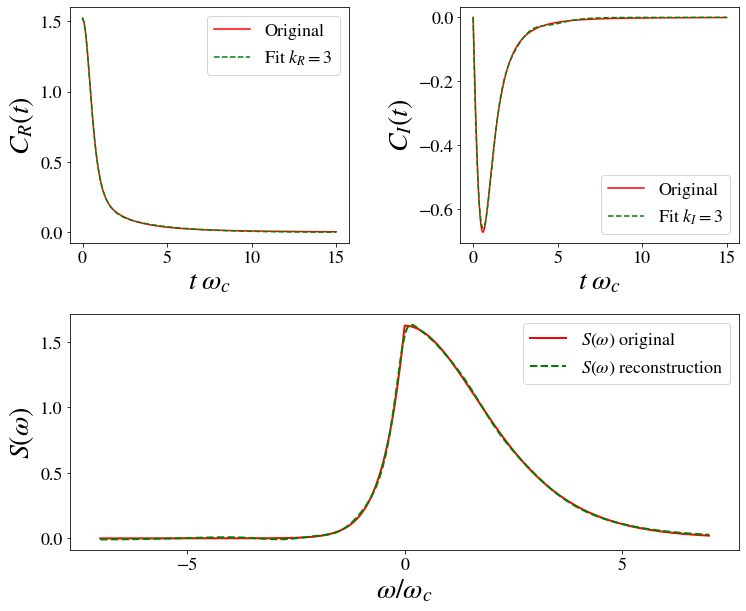

In [288]:

from cycler import cycler


wlist2 = np.linspace(-7,7 , 50000)



s1 =  [w * alpha * e**(-abs(w)/wc) *  ((1/(e**(w/T)-1))+1) for w in wlist2]
s2 =  spectrum_approx(wlist2,ckAR,vkAR)
s2.extend(spectrum_approx(wlist2,[1.0j*ckk for ckk in ckAI],vkAI))

#s2 =  spectrum_approx(wlist2,ckAI,vkAI)
print(len(s2))
s2sum = [0. for w in wlist2]
for s22 in s2:
    for kk,ww in enumerate(wlist2):
        s2sum[kk] += s22[kk]


fig = plt.figure(figsize=(12,10))
grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)

default_cycler = (cycler(color=['r', 'g', 'b', 'y','c','m','k']) +
                  cycler(linestyle=['-', '--', ':', '-.',(0, (1, 10)), (0, (5, 10)),(0, (3, 10, 1, 10))]))
plt.rc('axes',prop_cycle=default_cycler )

axes1 = fig.add_subplot(grid[0,0])
y = checker(tlist2, popt1[2], 3)
axes1.plot(tlist2, corrRana,label="Original")
axes1.plot(tlist2, y,label="Fit $k_R = 3$")
axes1.legend(loc=0)

axes1.set_ylabel(r'$C_R(t)$',fontsize=28)

axes1.set_xlabel(r'$t\;\omega_c$',fontsize=28)
axes1.locator_params(axis='y', nbins=6)
axes1.locator_params(axis='x', nbins=6)

axes2 = fig.add_subplot(grid[0,1])
y = checker2(tlist2, popt2[2], 3)
axes2.plot(tlist2, corrIana,label="Original")
axes2.plot(tlist2, y,label="Fit $k_I = 3$")
axes2.legend(loc=0)

axes2.set_ylabel(r'$C_I(t)$',fontsize=28)

axes2.set_xlabel(r'$t\;\omega_c$',fontsize=28)
axes2.locator_params(axis='y', nbins=6)
axes2.locator_params(axis='x', nbins=6)

axes3 = fig.add_subplot(grid[1,0:])
axes3.plot(wlist2, s1,  linewidth=2,label="$S(\omega)$ original")
axes3.plot(wlist2, real(s2sum),  linewidth=2, label="$S(\omega)$ reconstruction")

axes3.set_ylabel(r'$S(\omega)$',fontsize=28)

axes3.set_xlabel(r'$\omega/\omega_c$',fontsize=28)
axes3.locator_params(axis='y', nbins=6)
axes3.locator_params(axis='x', nbins=6)
axes3.legend(loc=0)
fig.savefig("figFitCspec.pdf")


In [ ]:


fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))
for sww in s2:
    axes.plot(wlist2, sww, linewidth=2)
#axes.plot(wlist2, s2sum, 'b', linewidth=2)

#axes.axvline(x=Del)


axes.set_ylabel(r'$S(\omega)$',fontsize=28)

axes.set_xlabel(r'$\omega/\gamma$',fontsize=28)
axes.locator_params(axis='y', nbins=6)
axes.locator_params(axis='x', nbins=6)
axes.legend(loc=0)
#fig.savefig("figFitCspec.pdf")


In [180]:

Q2 = []

NR = len(ckAR)
NI = len(ckAI)

Q2.extend([ sigmaz() for kk in range(NR)])
Q2.extend([ sigmaz() for kk in range(NI)])
options = Options(nsteps=15000, store_states=True, rtol=1e-14, atol=1e-14)

In [181]:
print(NR)
print(NI)

6
6


In [182]:


NC = 11

#Q2 = [Q for kk in range(NR+NI)]
#print(Q2)
options = Options(nsteps=1500, store_states=True, rtol=1e-12, atol=1e-12, method="bdf") 
import time

start = time.time()

#HEOMFit = BosonicHEOMSolver(Hsys, Q2, ckAR2, ckAI2, vkAR2, vkAI2, NC, options=options)
HEOMFitC = BosonicHEOMSolver(Hsys, Q2, ckAR, ckAI, vkAR, vkAI, NC, options=options)
print("hello")
end = time.time()
print(end - start)

hello
470.1895263195038


In [185]:

tlist4 = np.linspace(0, 30*pi/Del, 600)
rho0 = basis(2,0) * basis(2,0).dag()   


import time

start = time.time()
resultFit = HEOMFitC.run(rho0, tlist4)
print("hello")
end = time.time()
print(end - start)

KeyboardInterrupt: 

In [186]:
# Define some operators with which we will measure the system
# 1,1 element of density matrix - corresonding to groundstate
P11p=basis(2,0) * basis(2,0).dag()
P22p=basis(2,1) * basis(2,1).dag()
# 1,2 element of density matrix  - corresonding to coherence
P12p=basis(2,0) * basis(2,1).dag()
# Calculate expectation values in the bases
P11expC11k33L = expect(resultFit.states, P11p)
P22expC11k33L = expect(resultFit.states, P22p)
P12expC11k33L = expect(resultFit.states, P12p)


In [216]:
qsave(P11expC11k33L,'P11expC12k33L')
qsave(P11exp11K4NK1TL,'P11exp11K4NK1TL')
qsave(P11exp11K3NK1TL,'P11exp11K4NK1TL')
qsave(P11exp11K3NK2TL,'P11exp11K4NK1TL')

In [217]:
matplotlib.rcParams['figure.figsize'] = (7, 5)
matplotlib.rcParams['axes.titlesize'] = 25
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['legend.fontsize'] = 18
matplotlib.rcParams['axes.grid'] = False
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['lines.markersize'] = 5
matplotlib.rcParams['font.family'] = 'STIXGeneral' 
matplotlib.rcParams['mathtext.fontset'] =  'stix'

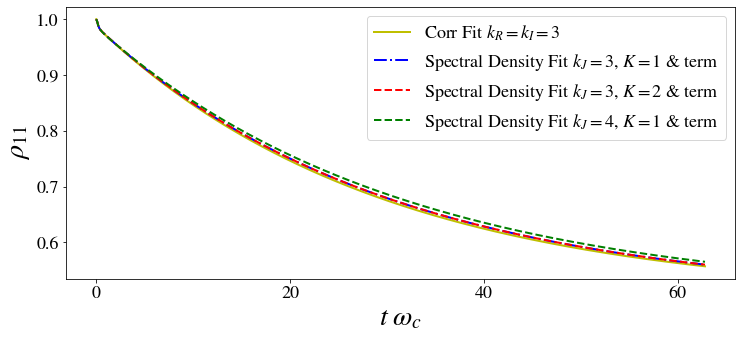

In [293]:
tlist4 = np.linspace(0, 4*pi/Del, 600)
# Plot the results
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(12,5))

axes.plot(tlist4, np.real(P11expC11k33L), 'y', linewidth=2, label="Corr Fit $k_R=k_I=3$")

axes.plot(tlist4, np.real(P11exp11K3NK1TL), 'b-.', linewidth=2, label="Spectral Density Fit $k_J=3$, $K=1$ & term")
axes.plot(tlist4, np.real(P11exp11K3NK2TL), 'r--', linewidth=2, label="Spectral Density Fit $k_J=3$, $K=2$ & term")
axes.plot(tlist4, np.real(P11exp11K4NK1TL), 'g--', linewidth=2, label="Spectral Density Fit $k_J=4$, $K=1$ & term")
axes.set_ylabel(r'$\rho_{11}$',fontsize=28)

axes.set_xlabel(r'$t\;\omega_c$',fontsize=28)
axes.locator_params(axis='y', nbins=6)
axes.locator_params(axis='x', nbins=6)
axes.legend(loc=0)
fig.savefig("figFit.pdf")

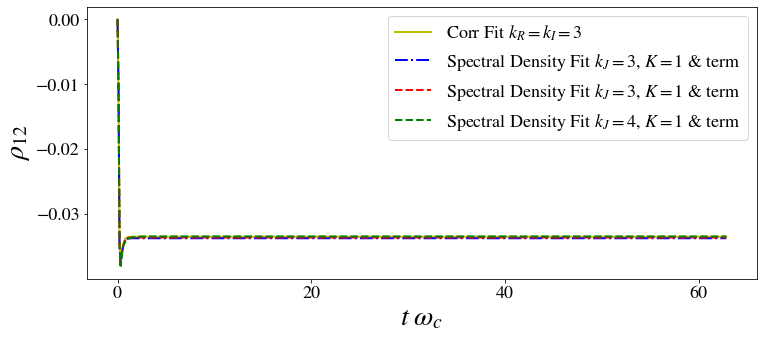

In [292]:
tlist4 = np.linspace(0, 4*pi/Del, 600)
# Plot the results
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(12,5))

axes.plot(tlist4, np.real(P12expC11k33L), 'y', linewidth=2, label="Corr Fit $k_R=k_I=3$")

axes.plot(tlist4, np.real(P12exp11K3NK1TL), 'b-.', linewidth=2, label="Spectral Density Fit $k_J=3$, $K=1$ & term")
axes.plot(tlist4, np.real(P12exp11K3NK2TL), 'r--', linewidth=2, label="Spectral Density Fit $k_J=3$, $K=1$ & term")
axes.plot(tlist4, np.real(P12exp11K4NK1TL), 'g--', linewidth=2, label="Spectral Density Fit $k_J=4$, $K=1$ & term")
axes.set_ylabel(r'$\rho_{12}$',fontsize=28)

axes.set_xlabel(r'$t\;\omega_c$',fontsize=28)
axes.locator_params(axis='y', nbins=6)
axes.locator_params(axis='x', nbins=6)
axes.legend(loc=0)


In [225]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.5.0.dev0
Numpy,1.18.1
SciPy,1.4.1
matplotlib,3.1.2
Cython,0.29.14
Number of CPUs,8
BLAS Info,INTEL MKL
IPython,7.11.1
Python,"3.7.3 (default, Mar 27 2019, 22:11:17) [GCC 7.3.0]"
OS,posix [linux]
